In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = 'results/'
K = 10

In [3]:
domain_label = {'aw': 'Australian \nwriters',
          'finance': 'Finance',
          'chess': 'Chess \nplayers',
          'fashion': 'Fashion'}

In [4]:
domain_label_2 = {'aw': 'a)',
                  'chess': 'b)',
                  'fashion': 'c)',
                  'finance': 'd)'}

## Boxplot of network methods

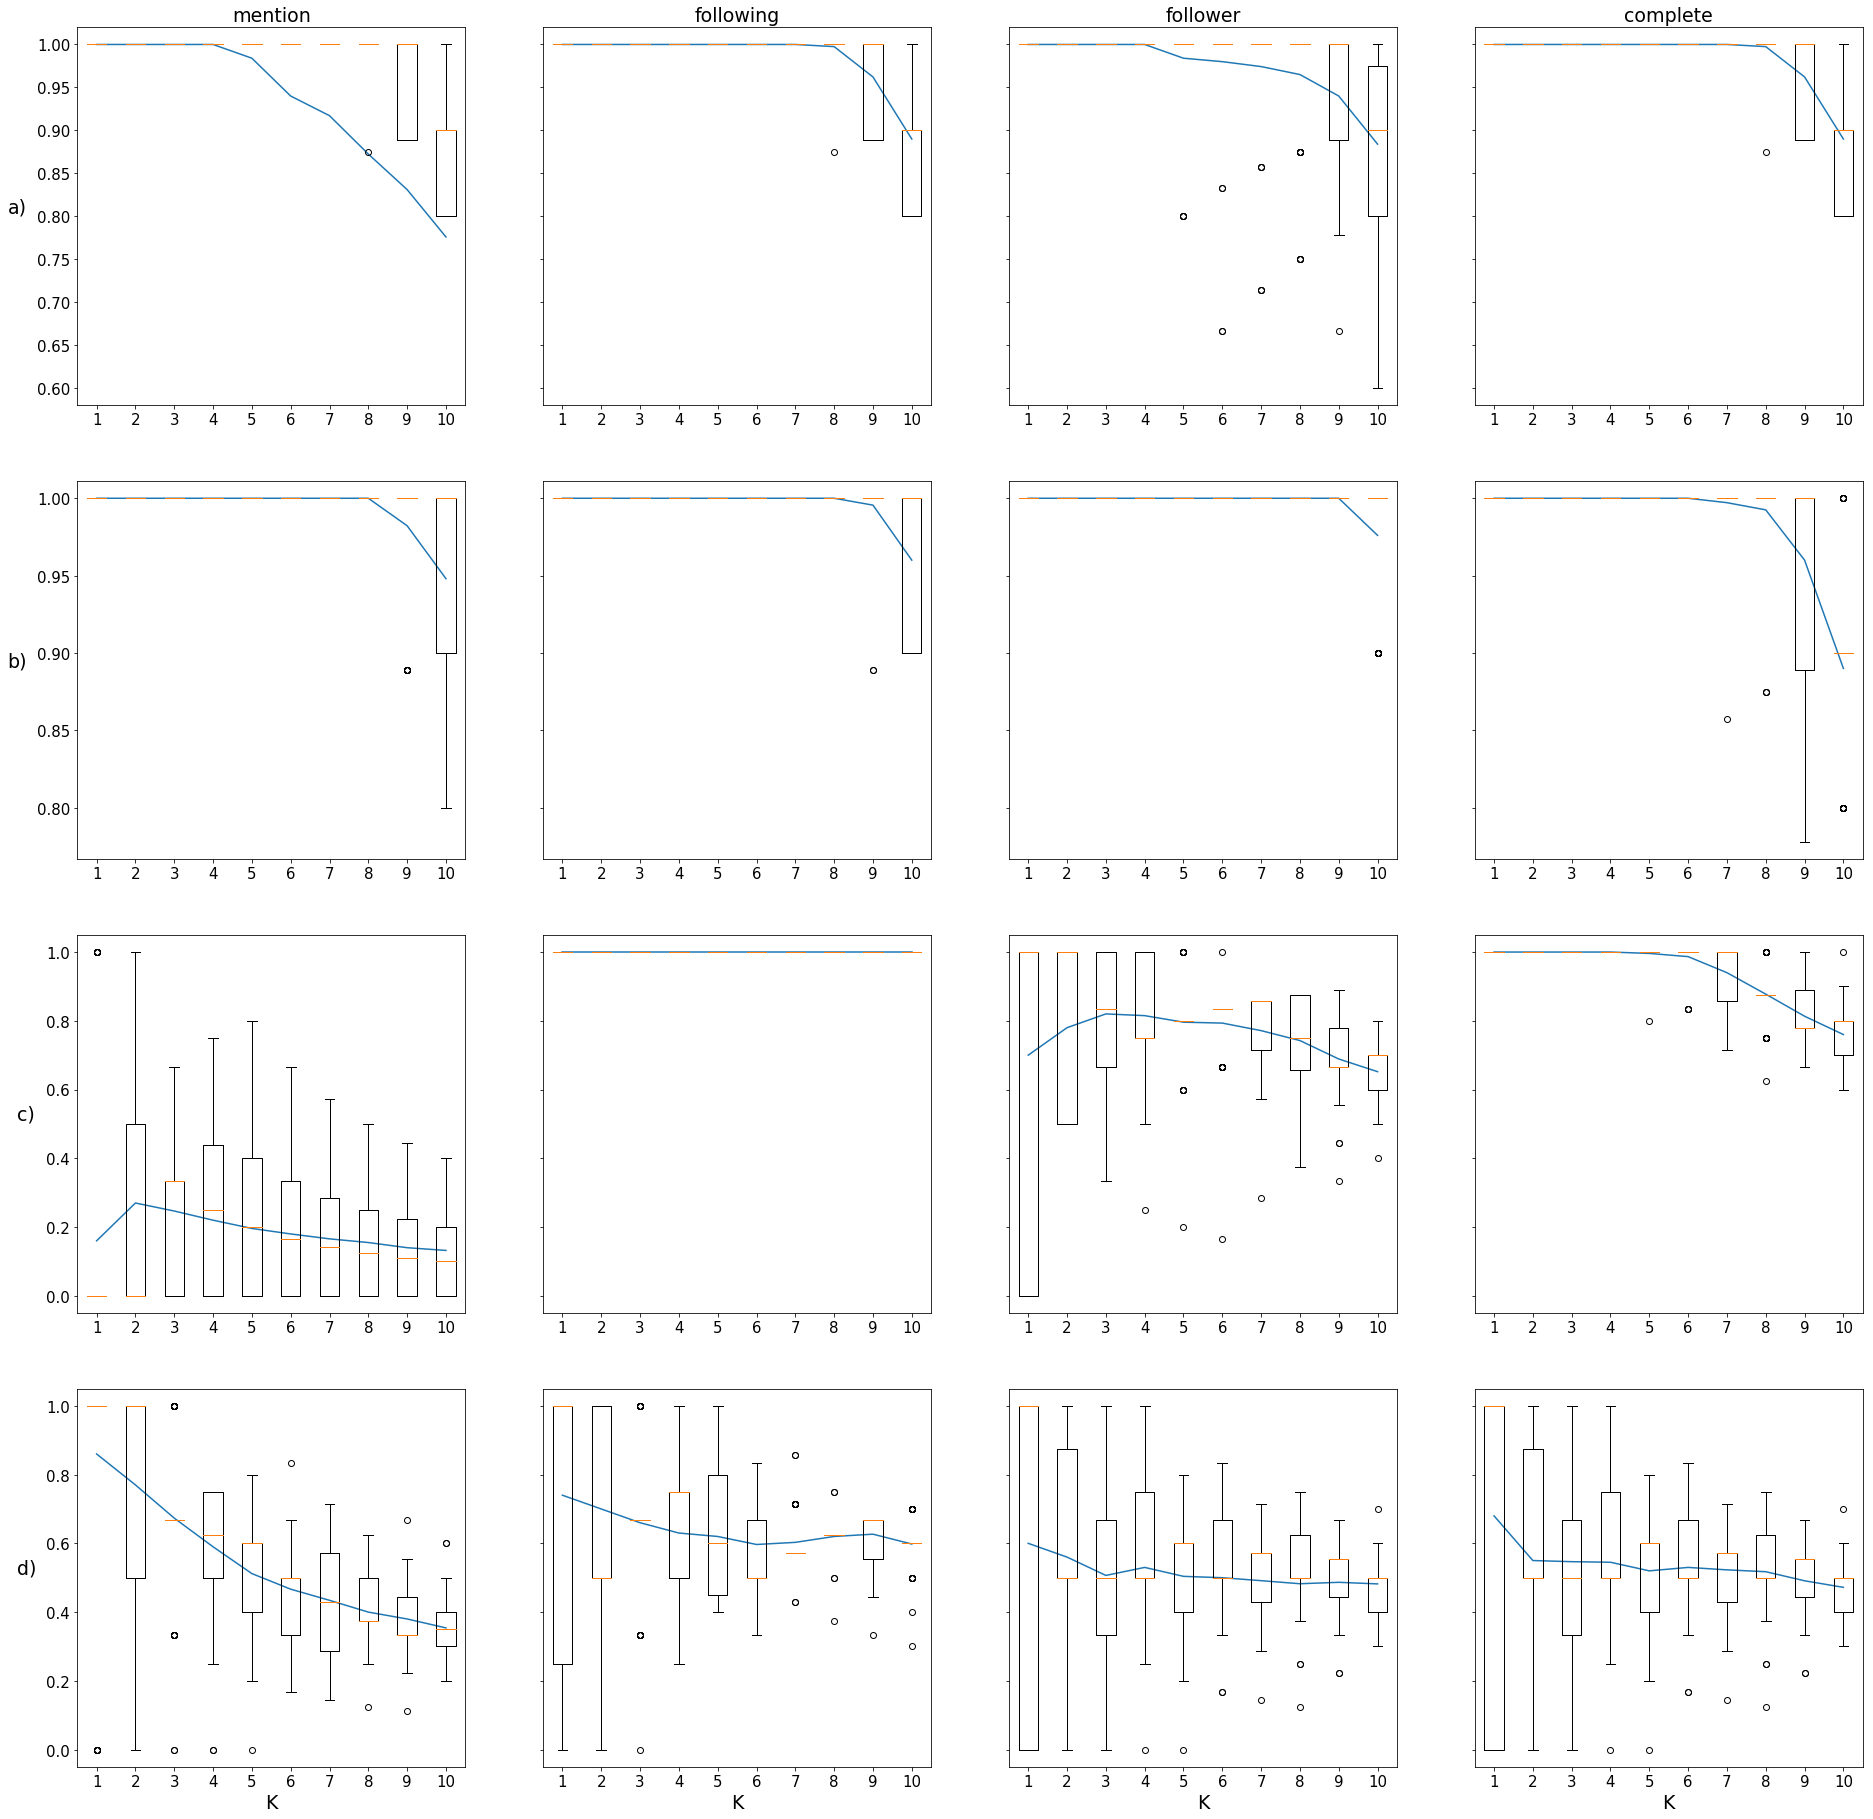

In [5]:
f, axes = plt.subplots(4, 4, sharey='row', figsize=(32, 32)) # sharex='col',
ticks_font = 15
labels_font = 19

k = 0 # row ax selector: domain
for domain in ['aw', 'chess', 'fashion', 'finance']:
    j = 0  # column ax selector: network type
    for network in ['mention', 'following', 'follower', 'complete']:
        mat = np.load(path + '{}_{}_matrix.npy'.format(domain, network))
        perf = np.load(path + '{}_{}_avg.npy'.format(domain, network))
        prec = [perf[i-1]/i for i in range(1, K+1)]


        axes[k, j].plot(range(1, K+1), prec)
        axes[k, j].boxplot(mat[:, :K])
        
        # title only for the first row plots
        if k == 0:
            axes[k, j].set_title(network, fontsize=labels_font)
        
        # yticks only for the left-most plots
        if j > 0:
            plt.setp(axes[k, j].get_yticklabels(), visible=False)
            # axes[k, j].set_yticks([])
        else:
            axes[k, j].set_ylabel(domain_label_2[domain], fontsize=labels_font, rotation=0, labelpad=20)
            axes[k, j].yaxis.set_tick_params(labelsize=ticks_font)
        
        
        if k < 3:
            axes[k, j].set_xticklabels([str(i) for i in range(1, K+1)])
        else:
            axes[k, j].set_xlabel('K', fontsize=labels_font)
            
        axes[k, j].xaxis.set_tick_params(labelsize=ticks_font)
            
        j += 1
    k += 1

## Boxplot of ensemble method

Merge of rankings and ensemble of the models

In [6]:
path = 'results/second-experiment/'

In [15]:
method_label = {
    'best_content': 'NNP', #'Best Content-based',
    'following': 'Following Network', #'best_context':'Best Context-based',
    'borda': 'Ensemble Rankings', #'Borda Counts',
    'ensemble': 'Ensemble Model'
}

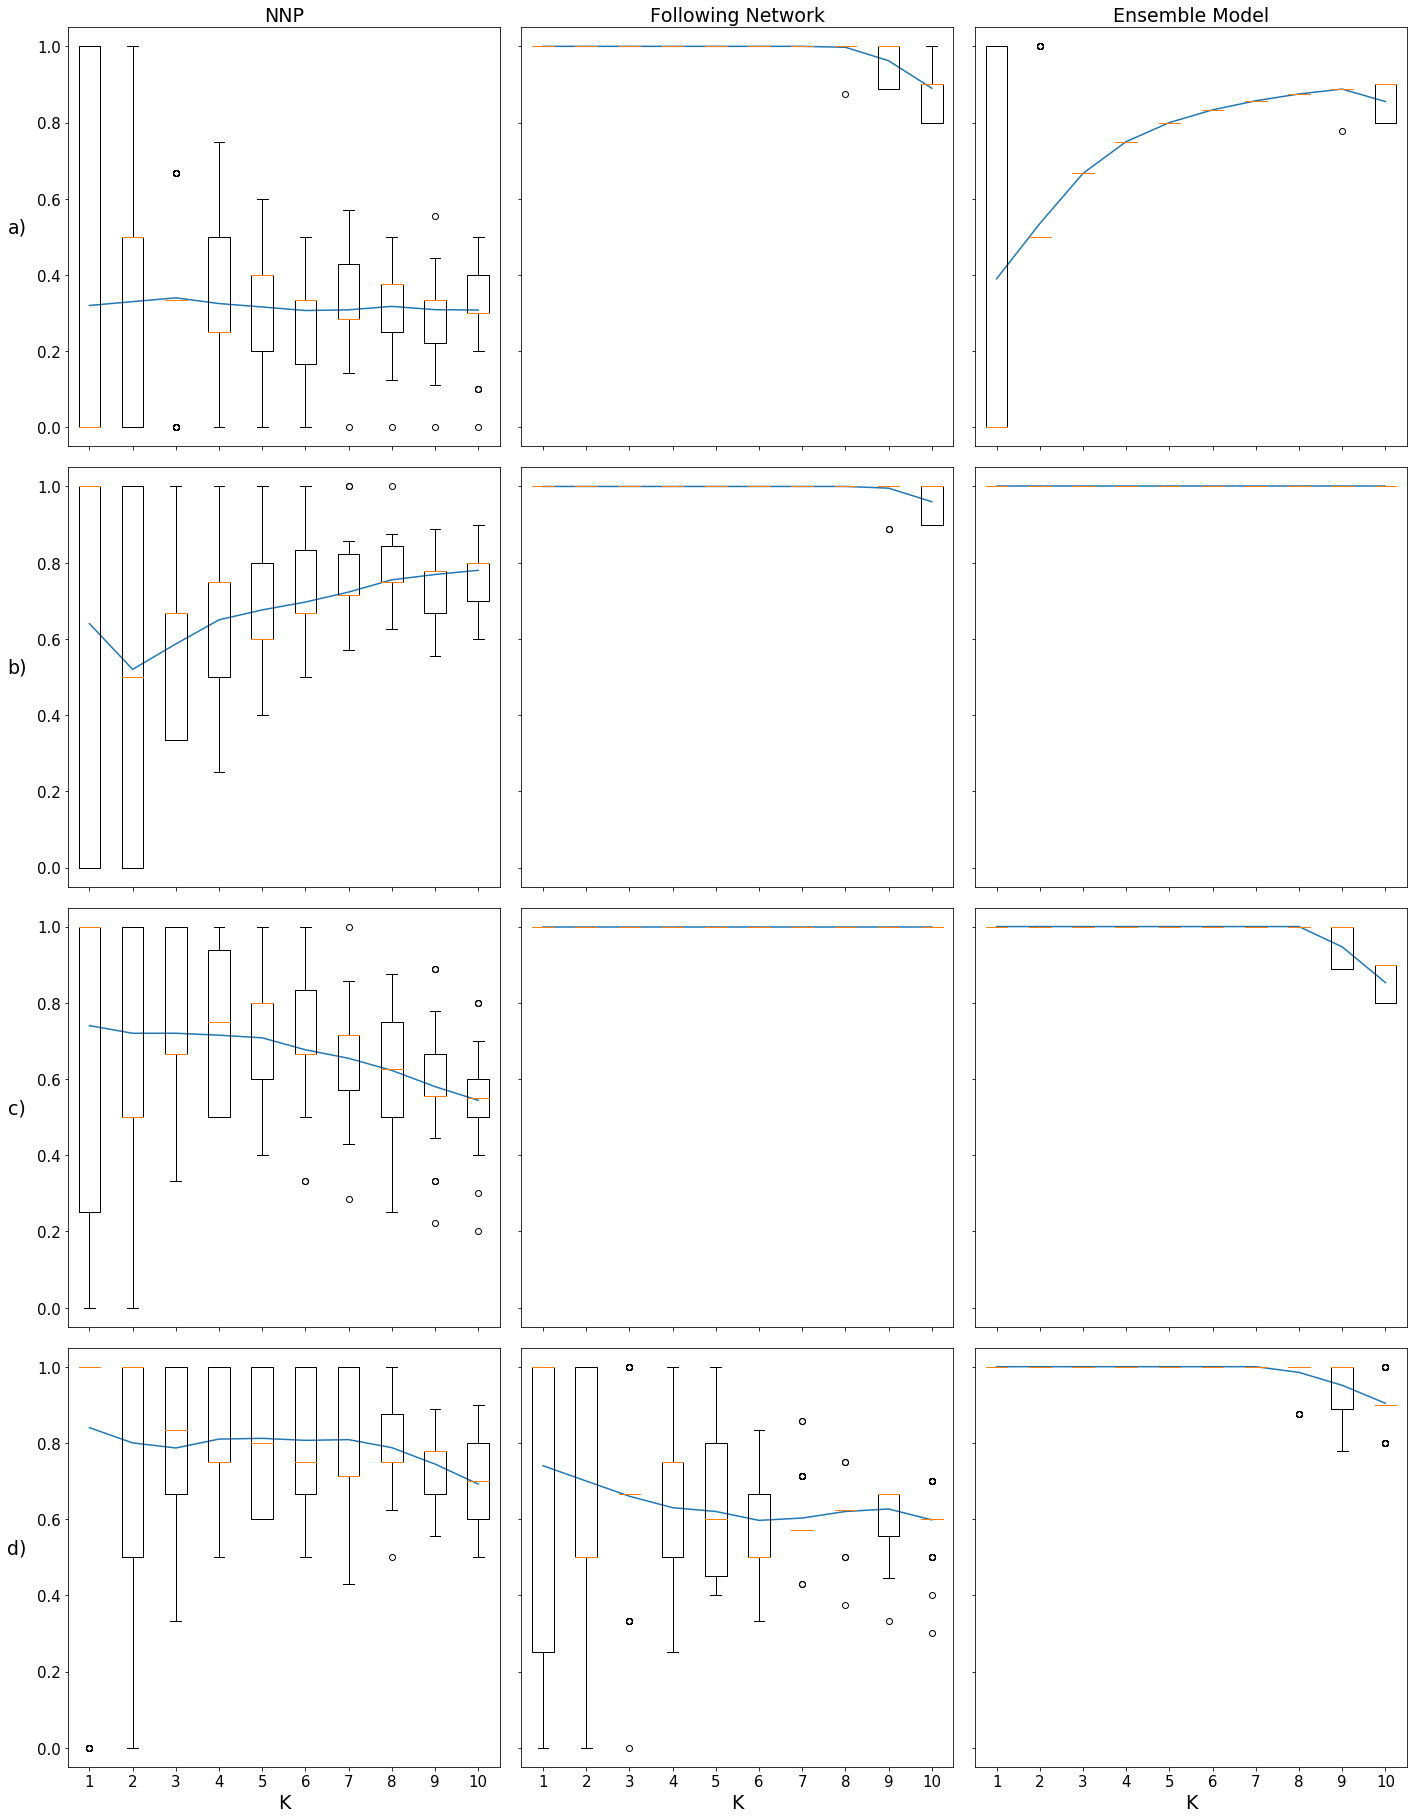

In [19]:
f, axes = plt.subplots(4, 3, figsize=(24, 32), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

ticks_font = 15
labels_font = 19

k = 0 # row ax selector: domain
for domain in ['aw', 'chess', 'fashion', 'finance']:
    j = 0  # column ax selector: network type
    for network in ['best_content', 'following', 'ensemble']: # 'borda',
        try:
            mat = np.load(path + '{}_{}_matrix.npy'.format(domain, network))
            perf = np.load(path + '{}_{}_avg.npy'.format(domain, network))

            if network == 'following':
                prec = [perf[i-1]/i for i in range(1, K+1)]
                perf = prec


            axes[k, j].plot(range(1, K+1), perf[:K])
            axes[k, j].boxplot(mat[:, :K])

            # title only for the first row plots
            if k == 0:
                axes[k, j].set_title(method_label[network], fontsize=labels_font)

            # yticks only for the left-most plots
            if j > 0:
                plt.setp(axes[k, j].get_yticklabels(), visible=False)
                # axes[k, j].set_yticks([])
            else:
                axes[k, j].set_ylabel(domain_label_2[domain], fontsize=labels_font, rotation=0, labelpad=20)
                axes[k, j].yaxis.set_tick_params(labelsize=ticks_font)

            if k == 3:
                axes[k, j].set_xlabel('K', fontsize=labels_font)

            axes[k, j].xaxis.set_tick_params(labelsize=ticks_font)
            
            # axes[k, j].grid(True)
        except:
            pass
            
        j += 1
    k += 1


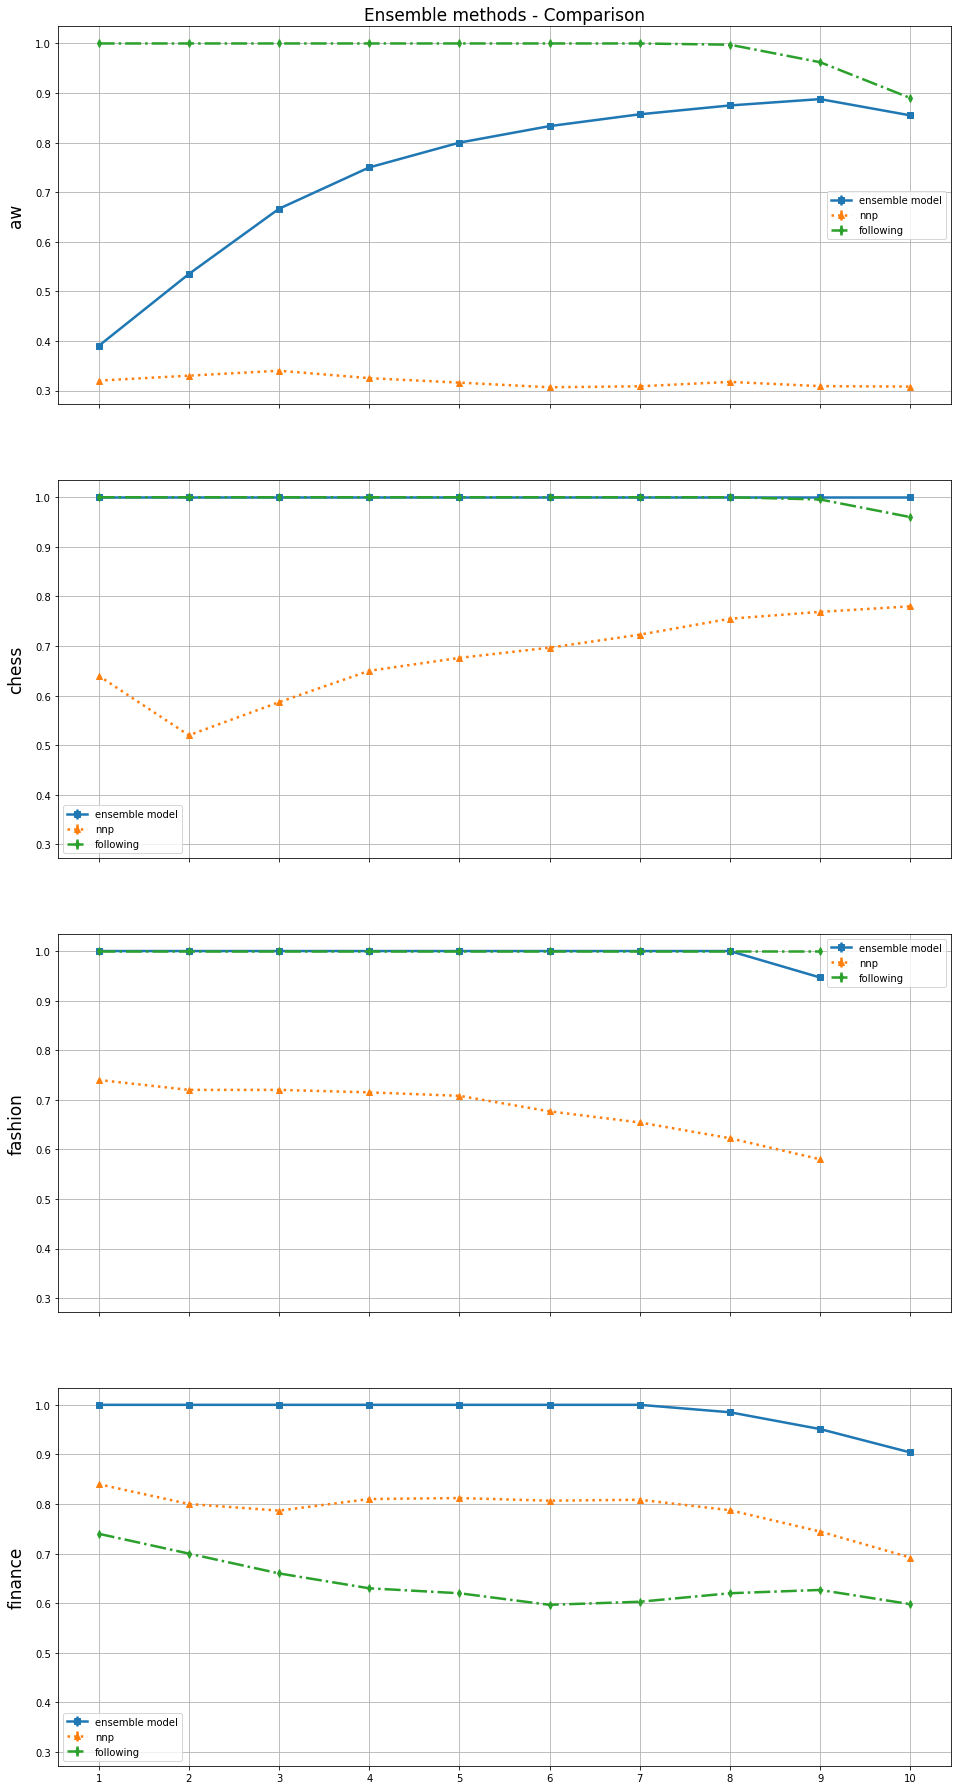

In [10]:
f, axes = plt.subplots(4, 1, figsize=(16, 32), sharex=True, sharey=True)
ticks_font = 15
labels_font = 17
line_w = 2.5
marker_size = 5.5
linestyles = ['-', '--', ':', '-.']
symbols = ['s','o', '^', 'd']

k = 0 # row ax selector: domain
for domain in ['aw', 'chess', 'fashion', 'finance']: 
    if domain == 'fashion':
        K = 9
    else:
        K = 10

    nnp = np.load(path + '{}_best_content_avg.npy'.format(domain))
    borda = np.load(path + '{}_borda_avg.npy'.format(domain))
    ensemble = np.load(path + '{}_ensemble_avg.npy'.format(domain))

    f = np.load(path + '{}_following_avg.npy'.format(domain))
    following = [f[i-1]/i for i in range(1, K+1)]

    x = range(1, K+1)
    axes[k].errorbar(x, ensemble[:K], yerr=[0.]*K, label='ensemble model', fmt=symbols[0], ms=marker_size, ls=linestyles[0], lw=line_w)
    #axes[k].errorbar(x, borda[:K], yerr=[0.]*K, label='ensemble ranking', fmt=symbols[1], ms=marker_size, ls=linestyles[1], lw=line_w)
    axes[k].errorbar(x, nnp[:K], yerr=[0.]*K, label='nnp', fmt=symbols[2], ms=marker_size, ls=linestyles[2], lw=line_w)
    axes[k].errorbar(x, following[:K], yerr=[0.]*K, label='following', fmt=symbols[3], ms=marker_size, ls=linestyles[3], lw=line_w)
    
    axes[k].set_ylabel(domain, fontsize=labels_font, rotation=90, labelpad=10)

    axes[k].legend()
    axes[k].grid()

    k += 1

axes[1].set_xticks(range(1, K+1))
axes[1].set_xticklabels([str(i) for i in range(1, K+1)])
#axes[1].xaxis.set_tick_params(labelsize=ticks_font)

axes[0].set_title('Ensemble methods - Comparison', fontsize=labels_font);

### Image for IC2S2

In [9]:
ticks_font = 26
labels_font = 30

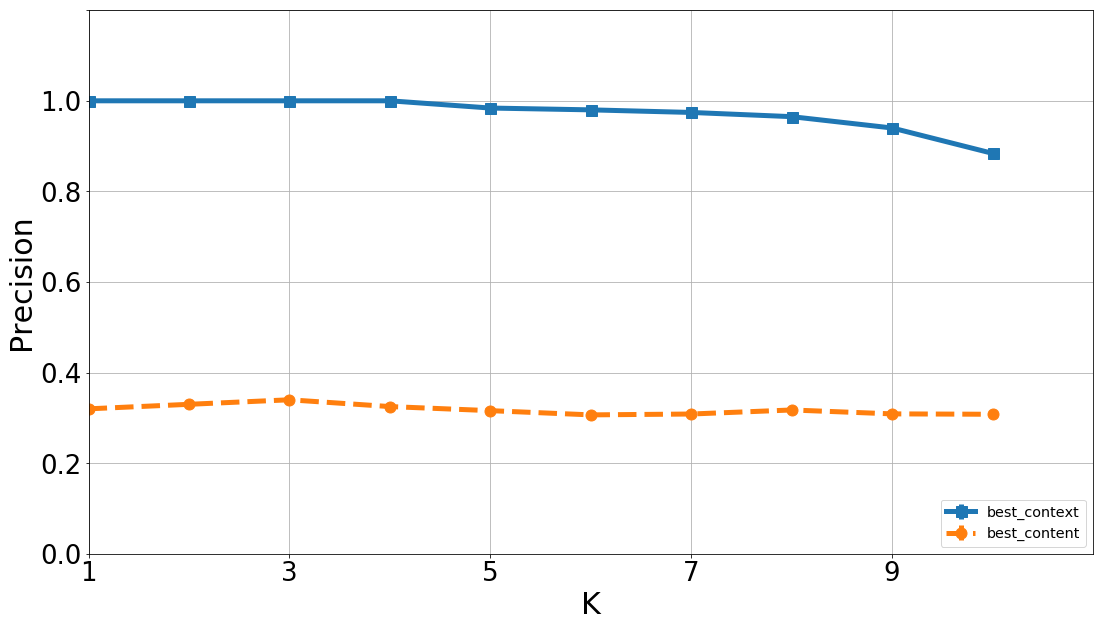

In [10]:
domain = 'aw'
x = range(K)
linestyles = ['-', '--', ':', '-.']
symbols = ['s','o', '^', 'd']
i = 0

plt.figure(figsize=(18,10))
for method in ['best_context','best_content']:
    perf = np.load(path + '{}_{}_avg.npy'.format(domain, method))
    
    #if method == 'best_content':
    prec = perf
    #else:
    #    prec = [perf[i-1]/i for i in range(1, K+1)]
    
    plt.errorbar(x, prec[:K], yerr=[0.]*K, label=method, fmt=symbols[i], ms=11, ls=linestyles[i], lw=5)
    
    i += 1
    
plt.legend(loc=4, fontsize='x-large')
# plt.title('Performance - AW', fontsize=16)
plt.ylabel('Precision', fontsize=labels_font)
plt.xlabel('K', fontsize=labels_font)

plt.xlim(xmin=1, xmax=K)
plt.ylim(ymin=0, ymax=1)
plt.yticks(np.arange(0, 1.21, 0.2), ['{:.1f}'.format(i) for i in np.arange(0, 1.1, 0.2)])
plt.xticks(range(0, K, 2), [str(i) for i in range(1, K+1, 2)])
plt.tick_params(labelsize=ticks_font)

plt.grid(True)

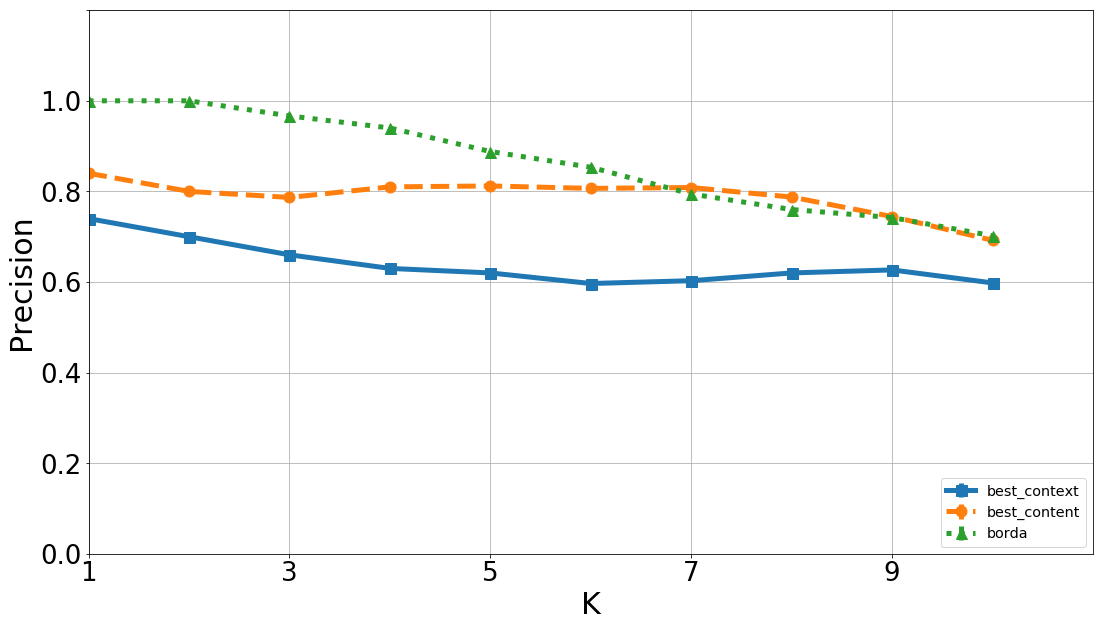

In [11]:
domain = 'finance'
x = range(K)
linestyles = ['-', '--', ':', '-.']
symbols = ['s','o', '^', 'd']
i = 0

plt.figure(figsize=(18,10))
for method in ['best_context','best_content', 'borda']:
    perf = np.load(path + '{}_{}_avg.npy'.format(domain, method))
    
    #if method == 'best_content':
    prec = perf
    #else:
    #    prec = [perf[i-1]/i for i in range(1, K+1)]
    
    plt.errorbar(x, prec[:K], yerr=[0.]*K, label=method, fmt=symbols[i], ms=11, ls=linestyles[i], lw=5)
    
    i += 1
    
plt.legend(loc=4, fontsize='x-large')
# plt.title('Performance - Finance', fontsize=16)
plt.ylabel('Precision', fontsize=labels_font)
plt.xlabel('K', fontsize=labels_font)

plt.xlim(xmin=1, xmax=K)
plt.ylim(ymin=0, ymax=1)
plt.yticks(np.arange(0, 1.21, 0.2), ['{:.1f}'.format(i) for i in np.arange(0, 1.1, 0.2)])
plt.xticks(range(0, K, 2), [str(i) for i in range(1, K+1, 2)])
plt.tick_params(labelsize=ticks_font)

plt.grid(True)